<a href="https://colab.research.google.com/github/VikashRandunu/ICBT-Lec/blob/main/VikashMLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation

# You can choose any dataset here. For demonstration, I'll use CIFAR-10
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Choose required classes
required_classes = [0, 1]  # For example, selecting classes 0 (airplane) and 1 (automobile)

# Filter train and test data for required classes
train_mask = np.isin(y_train, required_classes).flatten()
test_mask = np.isin(y_test, required_classes).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

num_classes = len(required_classes)

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 2: Model Selection and Training

# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(len(required_classes), activation='softmax')(x)

# Combine base model and custom head
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the model
batch_size = 32
epochs = 10

history = model.fit(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))

58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
250/250 [==============================] - 141s 560ms/step - loss: 0.3445 - accuracy: 0.8470 - val_loss: 0.2321 - val_accuracy: 0.9005
Epoch 2/10
250/250 [==============================] - 141s 564ms/step - loss: 0.2759 - accuracy: 0.8850 - val_loss: 0.2281 - val_accuracy: 0.8985
Epoch 3/10
250/250 [==============================] - 140s 559ms/step - loss: 0.2693 - accuracy: 0.8896 - val_loss: 0.2026 - val_accuracy: 0.9115
Epoch 4/10
250/250 [==============================] - 142s 567ms/step - loss: 0.2610 - accuracy: 0.8930 - val_loss: 0.2017 - val_accuracy: 0.9130
Epoch 5/10
250/250 [==============================] - 122s 488ms/step - loss: 0.2501 - accuracy: 0.8941 - val_loss: 0.2040 - val_accuracy: 0.9150
Epoch 6/10
250/250 [==============================] - 139s 556ms/step - loss: 0.2526 - accuracy: 0.8956 - val_loss: 0.2071 - val_accuracy: 0.9090
Epoch 7/10
250/250 [==============================] - 141s 564ms/step - loss: 0.2421 - accuracy: 0.9004 - val_loss: 0.2011 -

63/63 [==============================] - 24s 379ms/step - loss: 0.1894 - accuracy: 0.9235
Test Loss: 0.1893782615661621, Test Accuracy: 0.9235000014305115


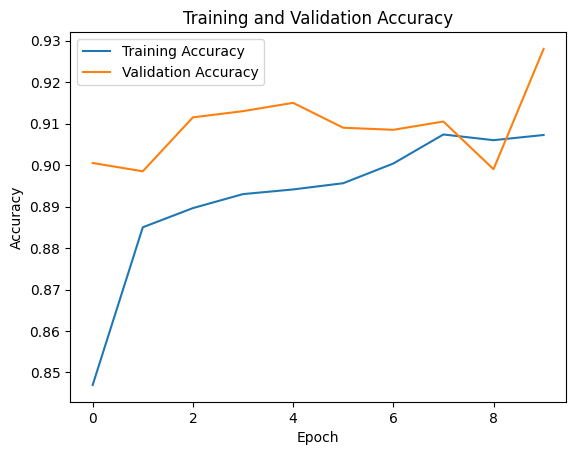

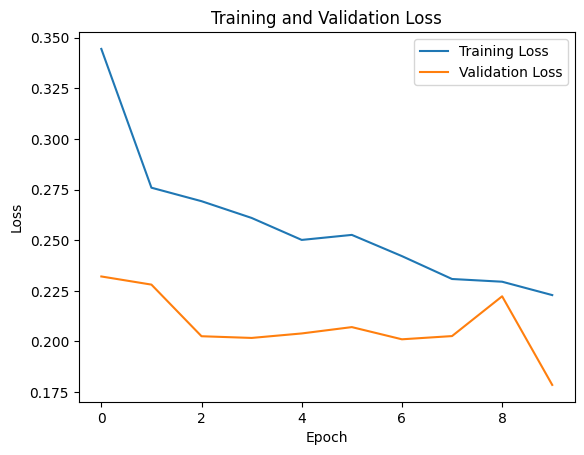

In [3]:
# Step 3: Evaluation and Visualization

# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Step 4: Object Detection

# Load an image for testing
import cv2
image_path = '/content/WhatsApp Image 2024-04-06 at 13.41.26_bcf9fe32.jpg'  # Replace 'test_image.jpg' with your image path
test_image = cv2.imread(image_path)
resized_image = cv2.resize(test_image, (32, 32))  # Resize the image to match model input size

# Preprocess the image
normalized_image = resized_image.astype('float32') / 255.0
normalized_image = np.expand_dims(normalized_image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(normalized_image)
predicted_classes = np.argmax(predictions, axis=1)

# Map predicted classes to actual class names
class_names = {0: 'Airplane', 1: 'Automobile'}  # Update with your chosen class names

# Visualize predictions on the image
predicted_class_name = class_names[predicted_classes[0]]
cv2.putText(test_image, predicted_class_name, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
from google.colab.patches import cv2_imshow
!curl -o logo.png https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.goodhousekeeping.com%2Flife%2Fpets%2Fg4531%2Fcutest-dog-breeds%2F&psig=AOvVaw3GRVkGnLRqPXSSr1wWuKqG&ust=1712478421510000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCKCykbGVrYUDFQAAAAAdAAAAABAE
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step 5: Report and Reflection
# Write a report summarizing your approach, results, and challenges encountered.
# Discuss the strengths and weaknesses of your model, and potential improvements for future exploratio

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
